In [1]:
import pandas as pd
import numpy as np


In [2]:
# Loading the dataset
df = pd.read_csv("heart.csv")

# Showing the first few rows
df.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
# Checking shape and datatypes
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)

# Checking for missing values
print("\nMissing values:\n", df.isnull().sum())

# Quick statistical summary
df.describe()


Shape: (1190, 12)

Data types:
 age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

Missing values:
 age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [4]:
df['target'].value_counts(normalize=True) * 100


target
1    52.857143
0    47.142857
Name: proportion, dtype: float64

In [5]:
print("Columns in dataset:\n", df.columns.tolist())


Columns in dataset:
 ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


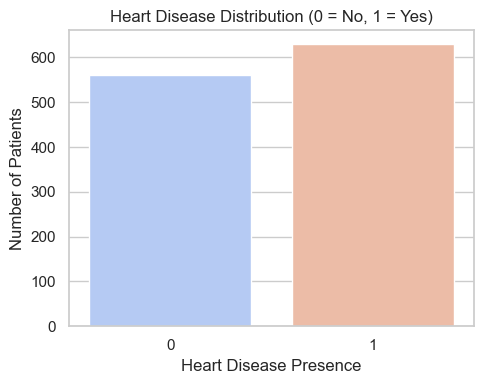

C:\Users\mundo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


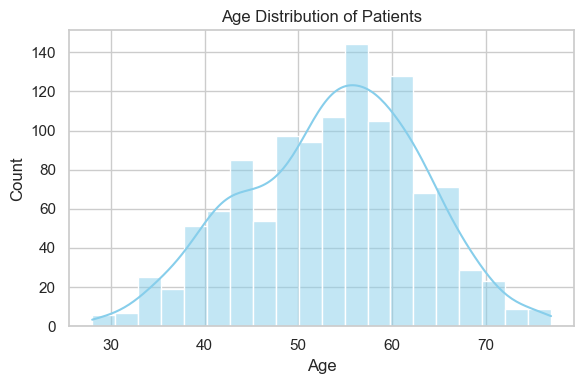

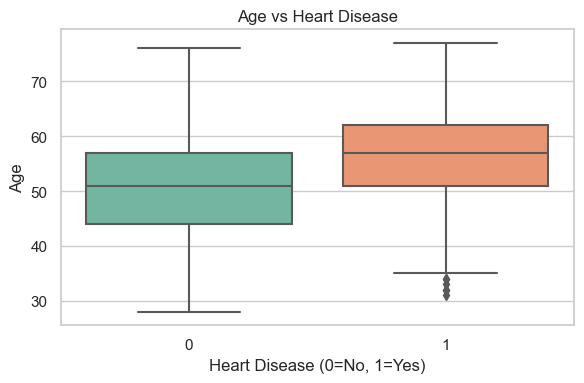

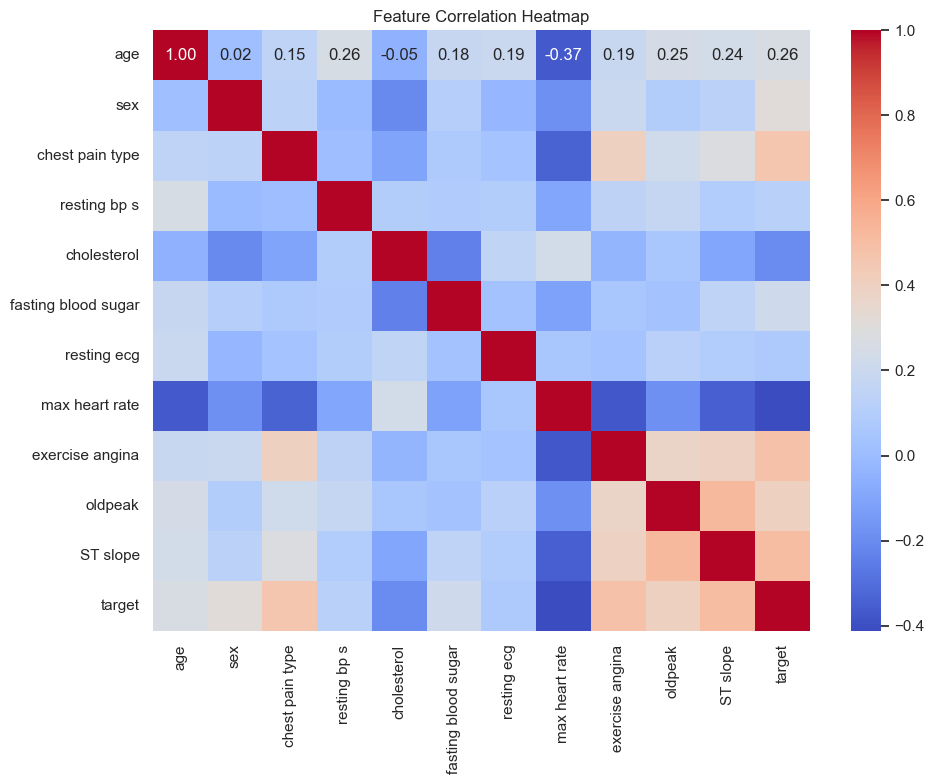

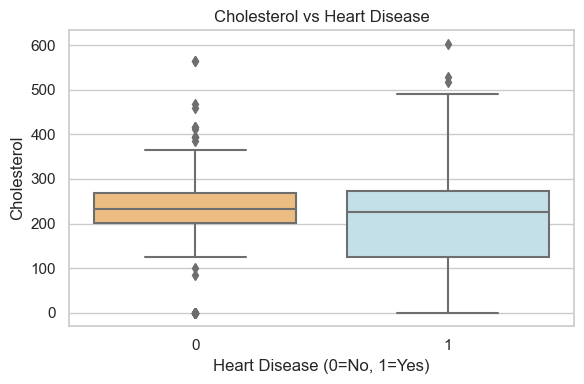

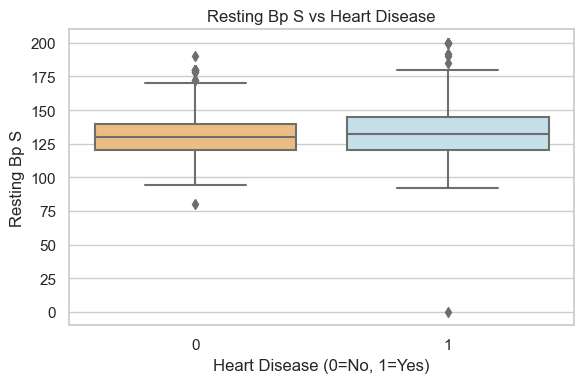

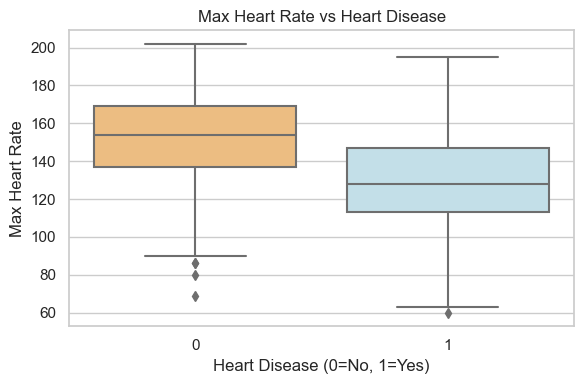

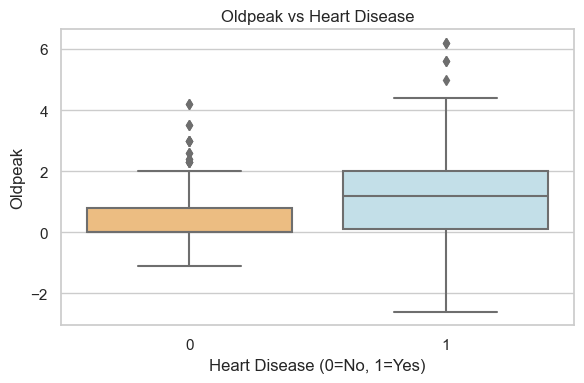

✅ All plots saved successfully in the 'plots/' folder!


In [6]:
# Step 4: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns
import os

# Creating a folder to store plots
os.makedirs("plots", exist_ok=True)

# Setting clean visual style
sns.set(style="whitegrid")

# ------------------------------
# 1️⃣ Distribution of Target Variable
# ------------------------------
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.xlabel("Heart Disease Presence")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.savefig("plots/heart_disease_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------
# 2️⃣ Age Distribution
# ------------------------------
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plots/age_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------
# 3️⃣ Age vs. Heart Disease
# ------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='age', data=df, palette='Set2')
plt.title("Age vs Heart Disease")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Age")
plt.tight_layout()
plt.savefig("plots/age_vs_heart_disease.png", dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------
# 4️⃣ Correlation Heatmap
# ------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("plots/feature_correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------
# 5️⃣ Comparing Some Key Features by Heart Disease Status
# ------------------------------
features_to_compare = ['cholesterol', 'resting bp s', 'max heart rate', 'oldpeak']

for col in features_to_compare:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=col, data=df, palette='RdYlBu')
    plt.title(f"{col.title()} vs Heart Disease")
    plt.xlabel("Heart Disease (0=No, 1=Yes)")
    plt.ylabel(col.title())
    plt.tight_layout()
    plt.savefig(f"plots/{col.replace(' ', '_')}_vs_heart_disease.png", dpi=300, bbox_inches='tight')
    plt.show()

print("✅ All plots saved successfully in the 'plots/' folder!")


In [7]:
# Step 5: Data Preprocessing & Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -----------------------------------
# Separating features (X) and target (y)
# -----------------------------------
X = df.drop('target', axis=1)
y = df['target']

# -----------------------------------
# Splitting dataset into train and test sets
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# -----------------------------------
# Normalizing numerical features
# -----------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data preprocessing complete! Features are now standardized.")


Training set size: (952, 11)
Testing set size: (238, 11)
✅ Data preprocessing complete! Features are now standardized.


⚠️ XGBoost not installed, skipping it.
🔹 Logistic Regression Accuracy: 0.840
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       112
           1       0.84      0.86      0.85       126

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238

------------------------------------------------------------
🔹 Random Forest Accuracy: 0.929
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       112
           1       0.93      0.94      0.93       126

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238

------------------------------------------------------------
🔹 SVM Accuracy: 0.735
              precision    recall  f1-score   support

           0       0.71      0.74     

C:\Users\mundo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


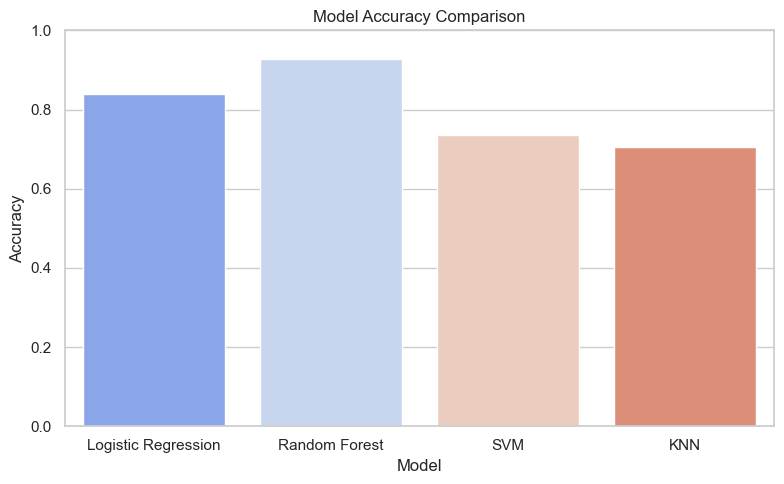

✅ Model training complete! Check the accuracy plot in the 'plots' folder.
✅ Random Forest model saved successfully as random_forest_model.pkl!
✅ model_columns.json saved with 11 columns!


In [14]:
# Step 6: Model Training and Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import json
import os

# Optional: if xgboost is installed
try:
    from xgboost import XGBClassifier
    has_xgb = True
except ImportError:
    has_xgb = False
    print("⚠️ XGBoost not installed, skipping it.")

# -----------------------------------
# Initializing models
# -----------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

if has_xgb:
    models["XGBoost"] = XGBClassifier(eval_metric='logloss', random_state=42)

# -----------------------------------
# Training and evaluating each model
# -----------------------------------
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"🔹 {name} Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# -----------------------------------
# Plotting model comparison
# -----------------------------------
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='coolwarm')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.tight_layout()

os.makedirs("plots", exist_ok=True)
plt.savefig("plots/model_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Model training complete! Check the accuracy plot in the 'plots' folder.")

# -----------------------------------
# ✅ Saving the best model (Random Forest)
# -----------------------------------
best_model = models["Random Forest"]

# Saving model
joblib.dump(best_model, "random_forest_model.pkl")
print("✅ Random Forest model saved successfully as random_forest_model.pkl!")

# -----------------------------------
# ✅ Saving model columns for Streamlit app
# -----------------------------------
# Ensuring 'X_train' exists and has column names
if 'X_train' in locals():
    model_columns = list(X_train.columns)
    with open("model_columns.json", "w") as f:
        json.dump(model_columns, f)
    print(f"✅ model_columns.json saved with {len(model_columns)} columns!")
else:
    print("⚠️ Could not find X_train variable — model_columns.json not saved.")


🔍 Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       112
           1       0.93      0.94      0.93       126

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



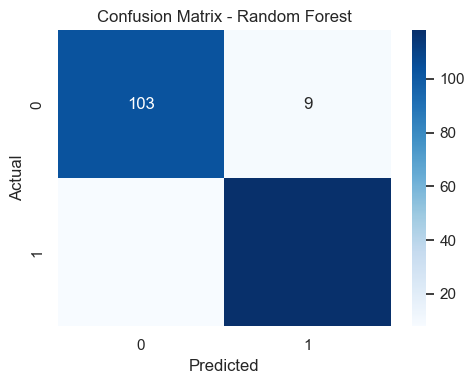

In [12]:
# Step 7: Evaluating the best model (Random Forest)
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Using the Random Forest model from dictionary
rf_model = models["Random Forest"]

# Predicting on the test data
y_pred = rf_model.predict(X_test)

# Printing evaluation report
print("🔍 Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("plots/confusion_matrix_random_forest.png", dpi=300, bbox_inches='tight')
plt.show()


In [13]:
import sklearn
print(sklearn.__version__)

1.2.2
